In [10]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import pandas as pd
import re
import os
import sys
import csv

sys.path.append("..")
import analysis_package.maxlab_analysis as mla

import analysis_package.burst as burst
from analysis_package.burst import Burst
import csv
#plt.switch_backend("Qt5Agg")

In [11]:
def stacked_bar_plot(pre, train, post, title):
    pre_proportion = np.sum(pre)/len(pre)
    train_proportion = np.sum(train)/len(train)
    post_proportion = np.sum(post)/len(post)
    props = np.array([pre_proportion, train_proportion, post_proportion])
    x_labels = ["pre", "train", "post"]

    plt.figure()
    plt.title(title)
    plt.bar(x_labels, props, label = "left to right")
    plt.bar(x_labels, 1- props, bottom = props, label = "right to left")
    ax = plt.gca()
    ax.bar_label(ax.containers[1], labels = [len(pre), len(train), len(post)])


    plt.legend()

    plt.show()

In [12]:
#Get bursts from raw data
homedir=os.path.expanduser("~")
chip_id = "M07480"
div = 30
well_no = 0
#filepath = f"/run/user/1000/gvfs/smb-share:server=rstoreint.it.tufts.edu,share=as_rsch_levinlab_wclawson01$/Experimental Data/Summer 2024/stim_removal/DIV{div}_stim_removal/{chip_id}/24{(div + 3)//31 + 7:02d}{(div + 2) % 31 + 1:02d}/1/well" + str(well_no) + "/"
filepath = f"/run/user/1000/gvfs/smb-share:server=rstoreint.it.tufts.edu,share=as_rsch_levinlab_wclawson01$/Experimental Data/Summer 2024/stim_removal/DIV{div}_stim_removal/{chip_id}/24{(div + 3)//31 + 7:02d}{(div + 2) % 31 + 1:02d}/0/well{str(well_no)}/"
#filepath = f"/run/user/1001/gvfs/smb-share:server=rstore.it.tufts.edu,share=as_rsch_levinlab_wclawson01$/Experimental Data/Summer 2024/stim_removal/DIV{div}_stim_removal/M07471/2407{div + 3}/0/well" + str(well_no) + "/"

filename = f"DIV{div}_stim_removal_well_" + str(well_no)
filetag = ".raw.h5"
datapath = homedir + "/temp/"

csv_filename = f"burst_direction_{well_no}.csv"

recording_no = 0

In [13]:
#NOTE: ISSUE WITH EVENTS BC SEQUENCES WERE SAVED UNDER THE SAME NAME. This issue was fixed at div 30.
if div <= 30:
    events = mla.load_events(f"/run/user/1000/gvfs/smb-share:server=rstoreint.it.tufts.edu,share=as_rsch_levinlab_wclawson01$/Experimental Data/Summer 2024/stim_removal/DIV{div}_stim_removal/{chip_id}/24{(div + 3)//31 + 7:02d}{(div + 2) % 31 + 1:02d}/0/well{5}/" + f"DIV{div}_stim_removal_well_" + str(5) + filetag, 5, recording_no)
else:
    events = mla.load_events(filepath + filename + filetag, well_no, recording_no)


display(events)

pre_time = events.loc[events["eventid"] == 2, "time"].values[0]

train_time = events.loc[events["eventid"] == 3, "time"].values[0]

post_time = events.loc[events["eventid"] == 4, "time"].values[0]

print(pre_time * 10000)
print(train_time * 10000)
print(post_time * 10000)

,frameno,eventtype,eventid,eventmessage,frameno_adjusted,time,eventmessage_decoded
0,345200723,1,1,"b'{""start_subprocess"":""1""}\n'",279,0.0279,"{""start_subprocess"":""1""}\n"
1,345250929,1,2,"b'{""before_training"":""1""}\n'",50485,5.0485,"{""before_training"":""1""}\n"
2,357251007,1,3,"b'{""training"":""1""}\n'",12050563,1205.0563,"{""training"":""1""}\n"
3,357336199,1,110,"b'{""amp_mV"":""50"",""dac"":""0"",""num_trains"":""1"",""p...",12135755,1213.5755,"{""amp_mV"":""50"",""dac"":""0"",""num_trains"":""1"",""pha..."
4,357336205,1,111,"b'{""amp_mV"":""50"",""dac"":""0"",""end_stimulation"":""...",12135761,1213.5761,"{""amp_mV"":""50"",""dac"":""0"",""end_stimulation"":""pu..."
...,...,...,...,...,...,...,...
8585,369178021,1,110,"b'{""amp_mV"":""50"",""dac"":""0"",""num_trains"":""1"",""p...",23977577,2397.7577,"{""amp_mV"":""50"",""dac"":""0"",""num_trains"":""1"",""pha..."
8586,369178027,1,111,"b'{""amp_mV"":""50"",""dac"":""0"",""end_stimulation"":""...",23977583,2397.7583,"{""amp_mV"":""50"",""dac"":""0"",""end_stimulation"":""pu..."
8587,369179225,1,110,"b'{""amp_mV"":""50"",""dac"":""0"",""num_trains"":""1"",""p...",23978781,2397.8781,"{""amp_mV"":""50"",""dac"":""0"",""num_trains"":""1"",""pha..."
8588,369179231,1,111,"b'{""amp_mV"":""50"",""dac"":""0"",""end_stimulation"":""...",23978787,2397.8787,"{""amp_mV"":""50"",""dac"":""0"",""end_stimulation"":""pu..."


50485.0
12050563.0
24050375.0


In [14]:
burst_thresh = 0.5

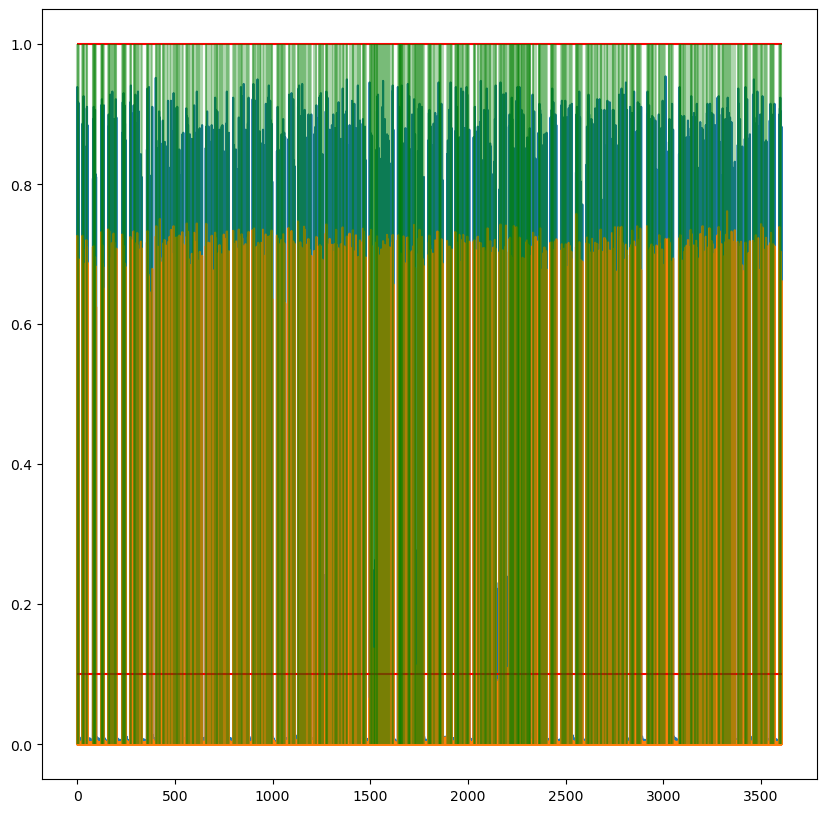

burst found in bin 107 (time 1.07 s)
burst found in bin 403 (time 4.03 s)
burst found in bin 585 (time 5.85 s)
burst found in bin 898 (time 8.98 s)
burst found in bin 2576 (time 25.76 s)
burst found in bin 2791 (time 27.91 s)
burst found in bin 3075 (time 30.75 s)
burst found in bin 3328 (time 33.28 s)
burst found in bin 3633 (time 36.33 s)
burst found in bin 4759 (time 47.59 s)
burst found in bin 5075 (time 50.75 s)
burst found in bin 5304 (time 53.04 s)
burst found in bin 8119 (time 81.19 s)
burst found in bin 8336 (time 83.36 s)
burst found in bin 8548 (time 85.48 s)
burst found in bin 8746 (time 87.46 s)
burst found in bin 8956 (time 89.56 s)
burst found in bin 9184 (time 91.84 s)
burst found in bin 9392 (time 93.92 s)
burst found in bin 9739 (time 97.39 s)
burst found in bin 12335 (time 123.35 s)
burst found in bin 12513 (time 125.13 s)
burst found in bin 12720 (time 127.20 s)
burst found in bin 12917 (time 129.17 s)
burst found in bin 13120 (time 131.20 s)
burst found in bin 1339

In [15]:
burst_list = burst.find_bursts(filepath, filename, well_no, recording_no, chip_id = chip_id, datapath = datapath, stim_thresh = 1, burst_thresh = 0.1)

In [16]:
# for i in burst_list:
#     if i.direction() < 0:
#         i.plot()
#         print(i.direction())

In [17]:
# stims = burst.find_bursts(filepath, filename, well_no, recording_no, datapath = datapath, stim_thresh = 1, bin_duration = 0.001, filtered = False)

In [18]:
burst_list_pre = list()
burst_list_pre_directions = list()
burst_list_train = list()
burst_list_train_directions = list()
burst_list_post = list()
burst_list_post_directions = list()
for i in burst_list:
    if train_time > i.time > pre_time:
        burst_list_pre.append(i)
        burst_list_pre_directions.append(i.direction(burst_thresh))
    elif post_time > i.time > train_time:
        burst_list_train.append(i)
        burst_list_train_directions.append(i.direction(burst_thresh))
    elif post_time < i.time:  
        burst_list_post.append(i)
        burst_list_post_directions.append(i.direction(burst_thresh))

In [19]:
burst_list_pre_directions = np.array(burst_list_pre_directions)
burst_list_train_directions = np.array(burst_list_train_directions)
burst_list_post_directions = np.array(burst_list_post_directions)

(array([124.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  88.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

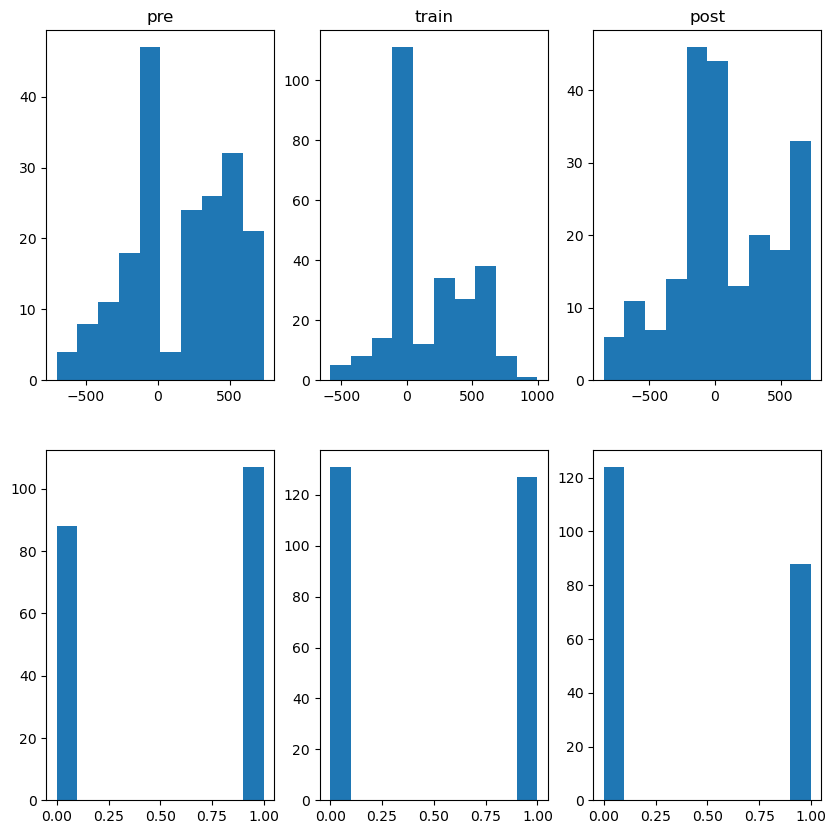

In [20]:
plt.figure(figsize = (10, 10))
plt.subplot(231)
plt.title("pre")
plt.hist(burst_list_pre_directions)
plt.subplot(232)
plt.title("train")
plt.hist(burst_list_train_directions)
plt.subplot(233)
plt.title("post")
plt.hist(burst_list_post_directions)

plt.subplot(234)
plt.hist((burst_list_pre_directions > 0).astype(int))
plt.subplot(235)
plt.hist((burst_list_train_directions > 0).astype(int))
plt.subplot(236)
plt.hist((burst_list_post_directions > 0).astype(int))

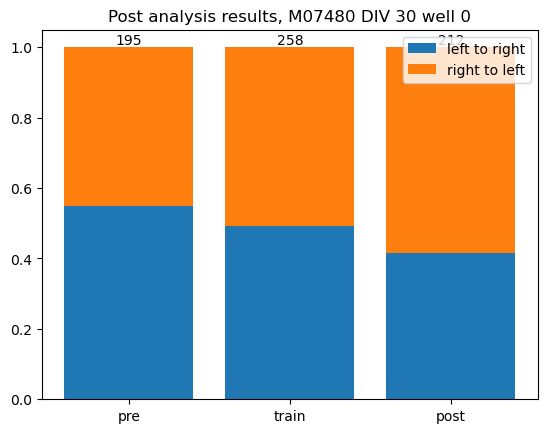

In [21]:
pre = ((burst_list_pre_directions > 0).astype(int))
train = ((burst_list_train_directions > 0).astype(int))
post = ((burst_list_post_directions > 0).astype(int))
title = f"Post analysis results, {chip_id} DIV {div} well {well_no}"
stacked_bar_plot(pre, train, post, title)

In [22]:
print(np.array(burst_list_pre_directions).shape)
print(np.array(burst_list_train_directions).shape)
print(np.array(burst_list_post_directions).shape)

(195,)
(258,)
(212,)


In [23]:
burst_directions = list()
burst_frames = list()
with open(filepath +csv_filename) as f:
    line_generator = (line.replace('"', '') for line in f)
    for i, row in enumerate(csv.reader(line_generator, delimiter=',')):
        if i % 4 == 1:
            time = float(row[0])
            burst_frames.append(time)
        elif i % 4 == 2:
            direction = row[-1]
            if direction == " right to left":
                burst_directions.append(0)
            elif direction == " left to right":
                burst_directions.append(1)

assert len(burst_directions) == len(burst_frames)


print(burst_directions)
print(burst_frames)

[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 

In [24]:
live_burst_list_pre = list()
live_burst_list_pre_directions = list()
live_burst_list_train = list()
live_burst_list_train_directions = list()
live_burst_list_post = list()
live_burst_list_post_directions = list()

for frame, direction in zip(burst_frames, burst_directions):
    if train_time * 10000 > frame + 50000 + 100 > pre_time:
        live_burst_list_pre.append(frame)
        live_burst_list_pre_directions.append(direction)
    elif post_time  * 10000 > frame + 50000 + 100 > train_time:
        live_burst_list_train.append(frame)
        live_burst_list_train_directions.append(direction)
    elif post_time * 10000 < frame + 50000 + 100:  
        live_burst_list_post.append(frame)
        live_burst_list_post_directions.append(direction)


(array([104.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  90.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

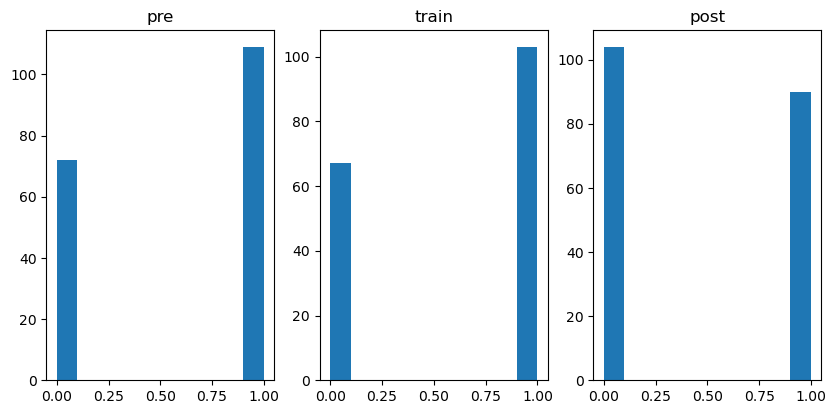

In [25]:
plt.figure(figsize = (10, 10))
plt.subplot(231)
plt.title("pre")
plt.hist(live_burst_list_pre_directions)
plt.subplot(232)
plt.title("train")
plt.hist(live_burst_list_train_directions)
plt.subplot(233)
plt.title("post")
plt.hist(live_burst_list_post_directions)

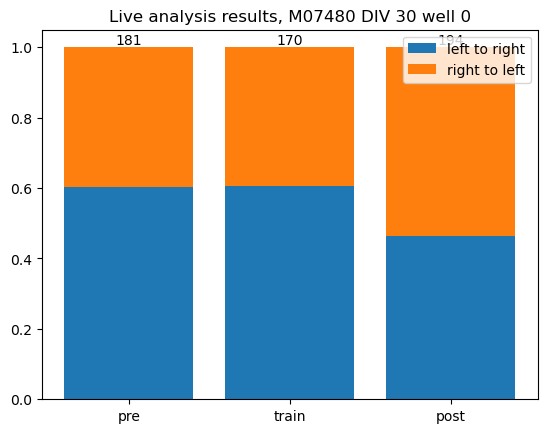

In [26]:
pre = live_burst_list_pre_directions
train = live_burst_list_train_directions
post = live_burst_list_post_directions
title = f"Live analysis results, {chip_id} DIV {div} well {well_no}"
stacked_bar_plot(pre, train, post, title)

In [1]:
for i in burst_list_pre[0]:
    i.plot()

NameError: name 'burst_list_pre' is not defined

# Run everything at once.

50485.0
12050563.0
24050375.0


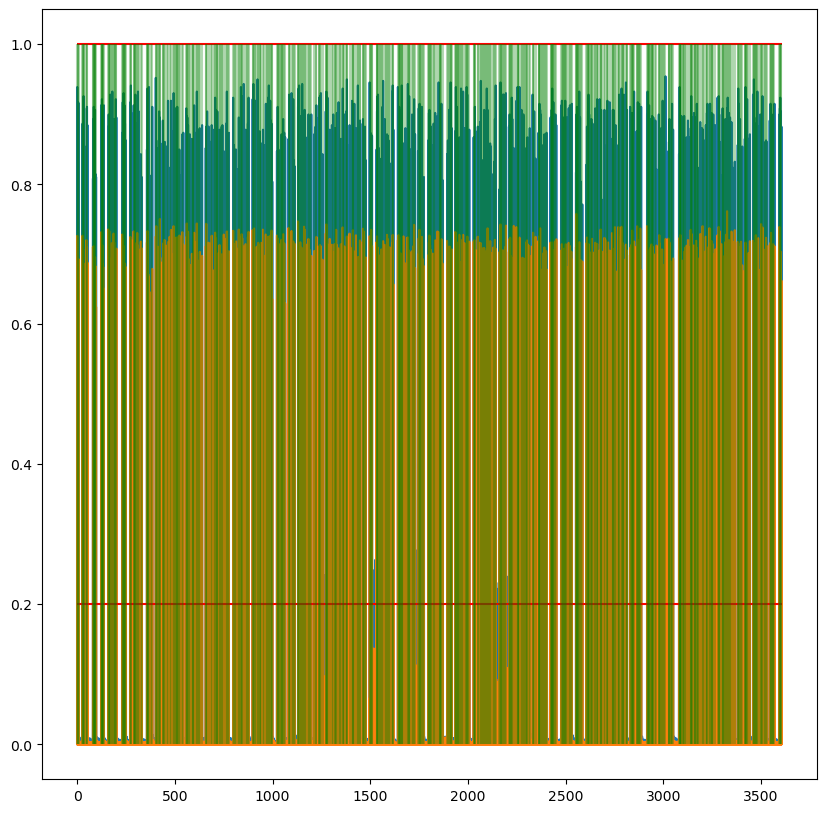

burst found in bin 107 (time 1.07 s)
burst found in bin 403 (time 4.03 s)
burst found in bin 585 (time 5.85 s)
burst found in bin 898 (time 8.98 s)
burst found in bin 2576 (time 25.76 s)
burst found in bin 2791 (time 27.91 s)
burst found in bin 3075 (time 30.75 s)
burst found in bin 3328 (time 33.28 s)
burst found in bin 3633 (time 36.33 s)
burst found in bin 4759 (time 47.59 s)
burst found in bin 5075 (time 50.75 s)
burst found in bin 5304 (time 53.04 s)
burst found in bin 8119 (time 81.19 s)
burst found in bin 8336 (time 83.36 s)
burst found in bin 8548 (time 85.48 s)
burst found in bin 8746 (time 87.46 s)
burst found in bin 8956 (time 89.56 s)
burst found in bin 9184 (time 91.84 s)
burst found in bin 9392 (time 93.92 s)
burst found in bin 9739 (time 97.39 s)
burst found in bin 12335 (time 123.35 s)
burst found in bin 12513 (time 125.13 s)
burst found in bin 12720 (time 127.20 s)
burst found in bin 12917 (time 129.17 s)
burst found in bin 13120 (time 131.20 s)
burst found in bin 1339

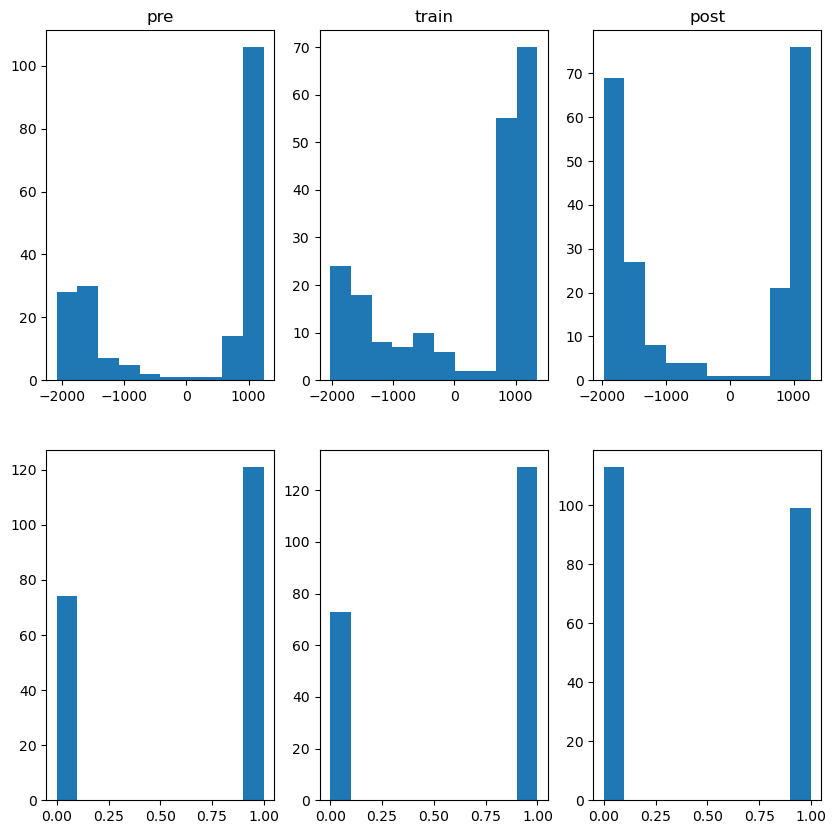

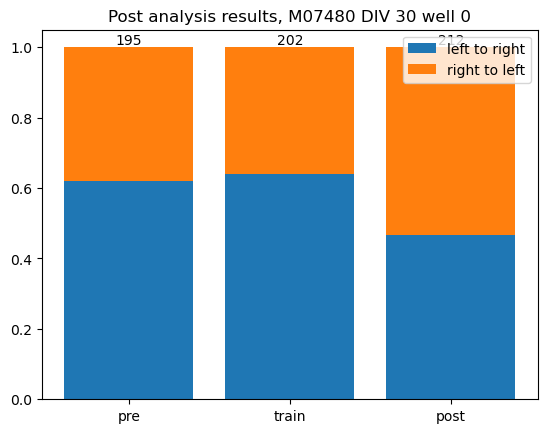

[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 

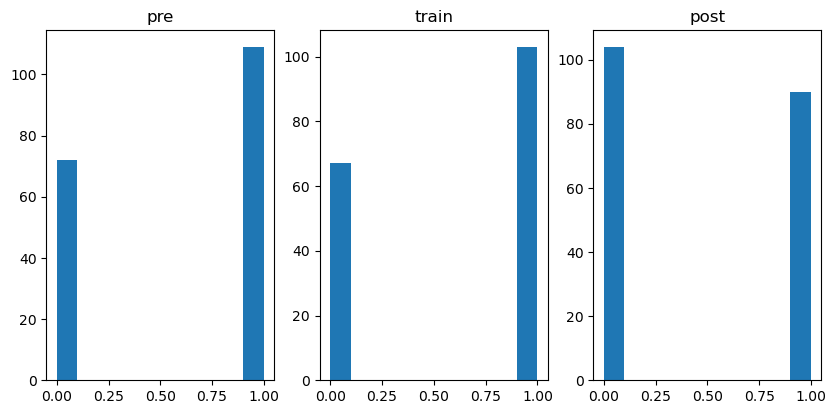

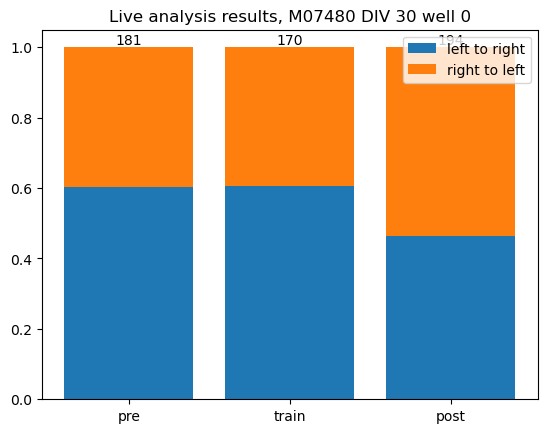

50485.0
12050563.0
24050375.0


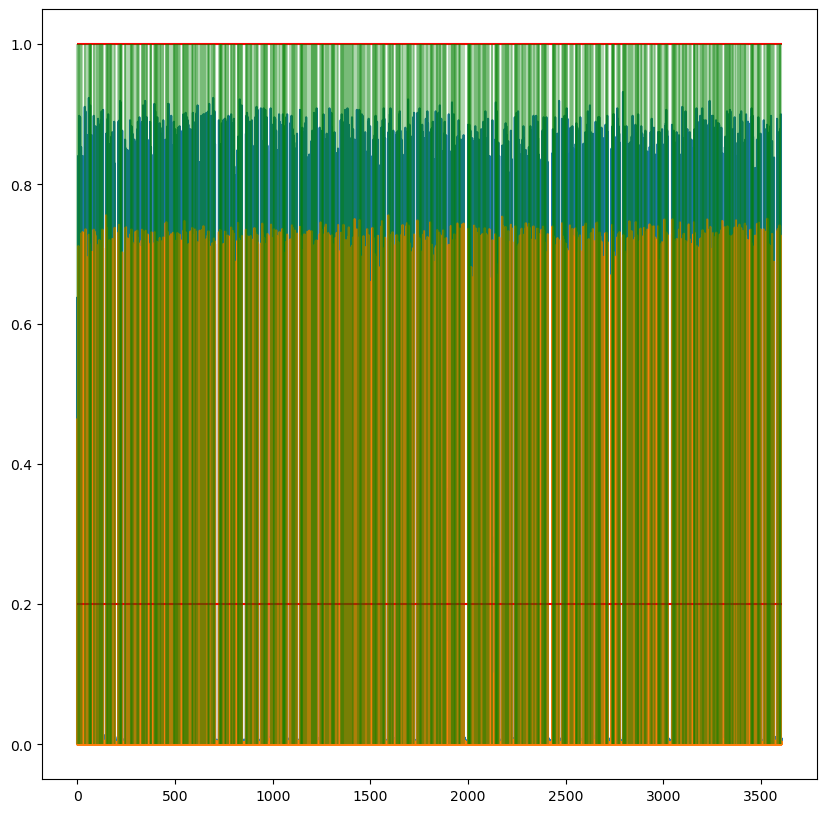

burst found in bin 148 (time 0.01 s)
burst found in bin 570 (time 4.23 s)
burst found in bin 846 (time 6.99 s)
burst found in bin 1084 (time 9.37 s)
burst found in bin 1540 (time 13.93 s)
burst found in bin 2066 (time 19.19 s)
burst found in bin 2773 (time 26.26 s)
burst found in bin 3938 (time 37.91 s)
burst found in bin 4283 (time 41.36 s)
burst found in bin 5253 (time 51.06 s)
burst found in bin 6039 (time 58.92 s)
burst found in bin 6294 (time 61.47 s)
burst found in bin 6516 (time 63.69 s)
burst found in bin 6710 (time 65.63 s)
burst found in bin 6966 (time 68.19 s)
burst found in bin 7138 (time 69.91 s)
burst found in bin 7357 (time 72.10 s)
burst found in bin 8532 (time 83.85 s)
burst found in bin 8876 (time 87.29 s)
burst found in bin 9452 (time 93.05 s)
burst found in bin 10354 (time 102.07 s)
burst found in bin 10730 (time 105.83 s)
burst found in bin 11312 (time 111.65 s)
burst found in bin 11564 (time 114.17 s)
burst found in bin 11894 (time 117.47 s)
burst found in bin 121

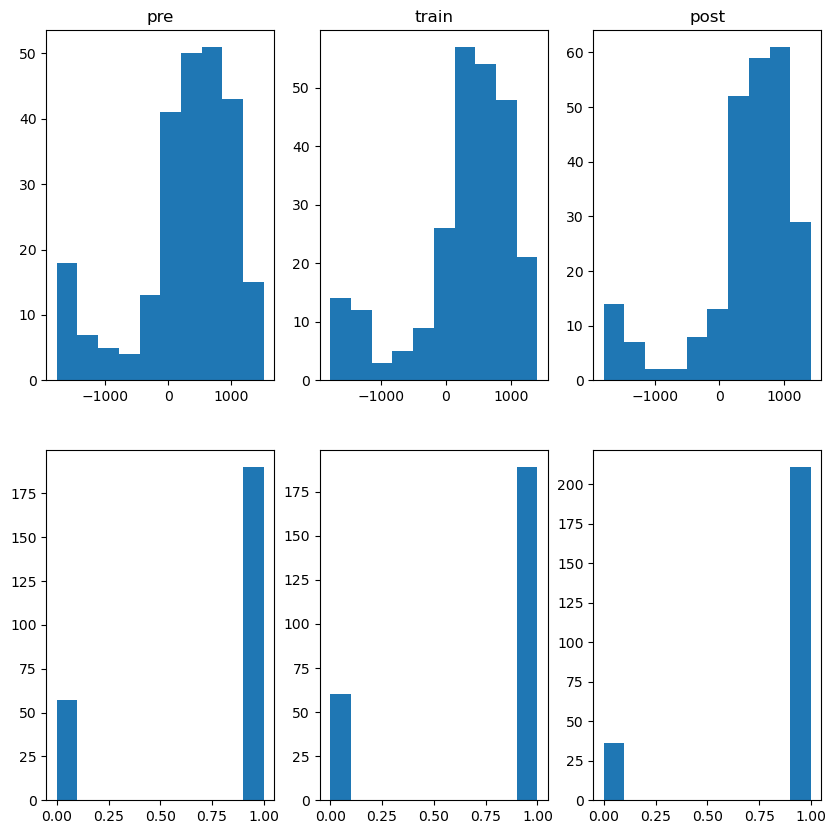

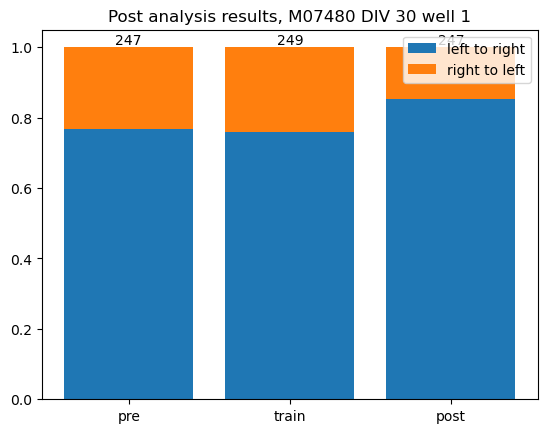

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 

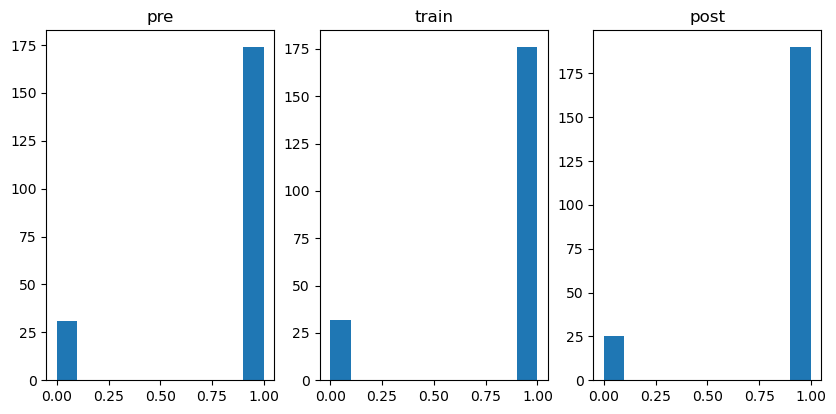

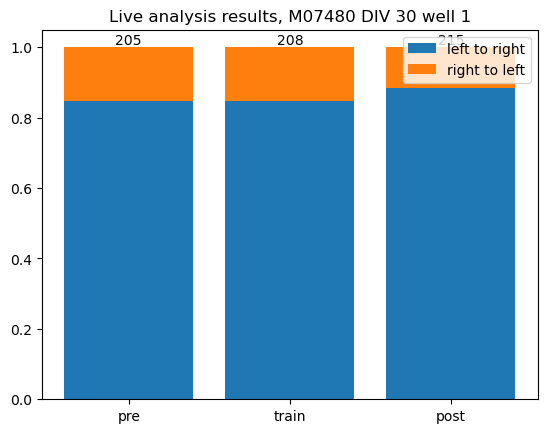

50485.0
12050563.0
24050375.0


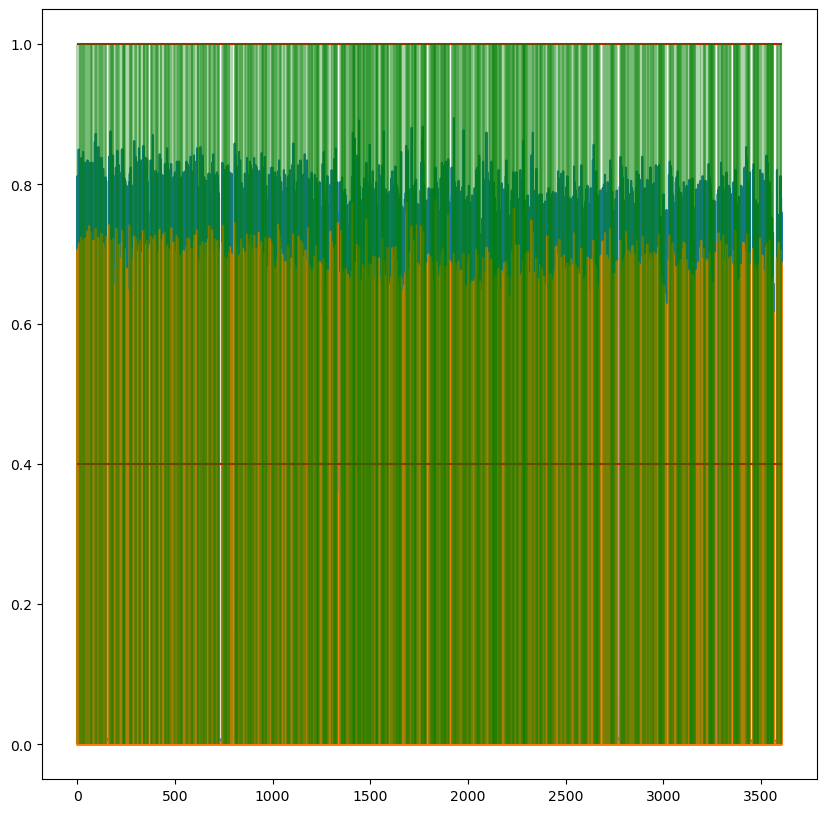

burst found in bin 168 (time 1.70 s)
burst found in bin 828 (time 8.30 s)
burst found in bin 1274 (time 12.76 s)
burst found in bin 1750 (time 17.52 s)
burst found in bin 2140 (time 21.42 s)
burst found in bin 2378 (time 23.80 s)
burst found in bin 2757 (time 27.59 s)
burst found in bin 3093 (time 30.95 s)
burst found in bin 3363 (time 33.65 s)
burst found in bin 3778 (time 37.80 s)
burst found in bin 4096 (time 40.98 s)
burst found in bin 4426 (time 44.28 s)
burst found in bin 4930 (time 49.32 s)
burst found in bin 5366 (time 53.68 s)
burst found in bin 6187 (time 61.89 s)
burst found in bin 6751 (time 67.53 s)
burst found in bin 6981 (time 69.83 s)
burst found in bin 7271 (time 72.73 s)
burst found in bin 7603 (time 76.05 s)
burst found in bin 7885 (time 78.87 s)
burst found in bin 8651 (time 86.53 s)
burst found in bin 9086 (time 90.88 s)
burst found in bin 9544 (time 95.46 s)
burst found in bin 9791 (time 97.93 s)
burst found in bin 10328 (time 103.30 s)
burst found in bin 10887 (t

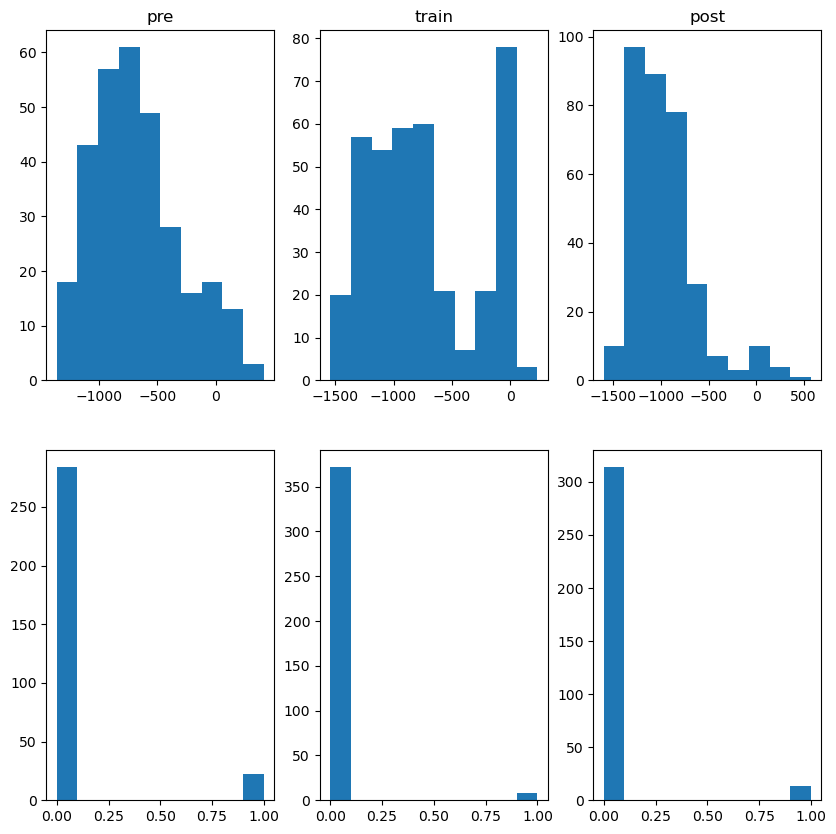

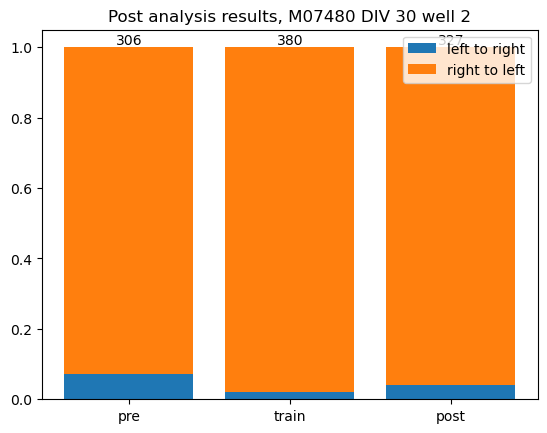

[0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

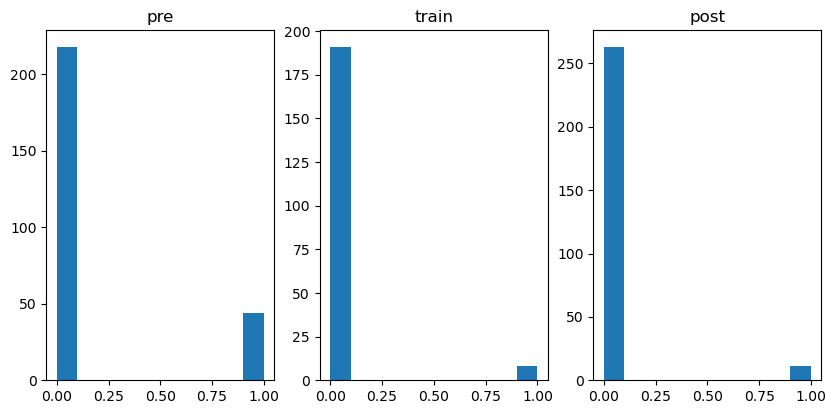

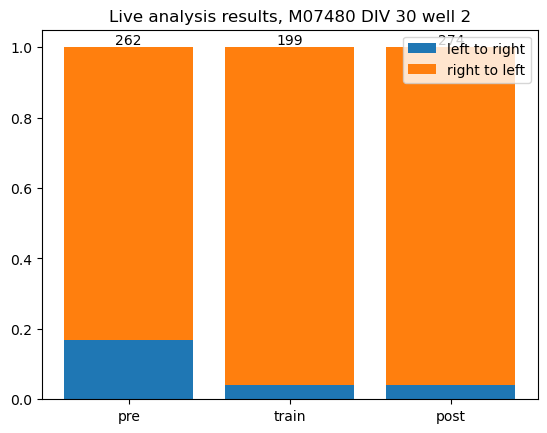

50485.0
12050563.0
24050375.0


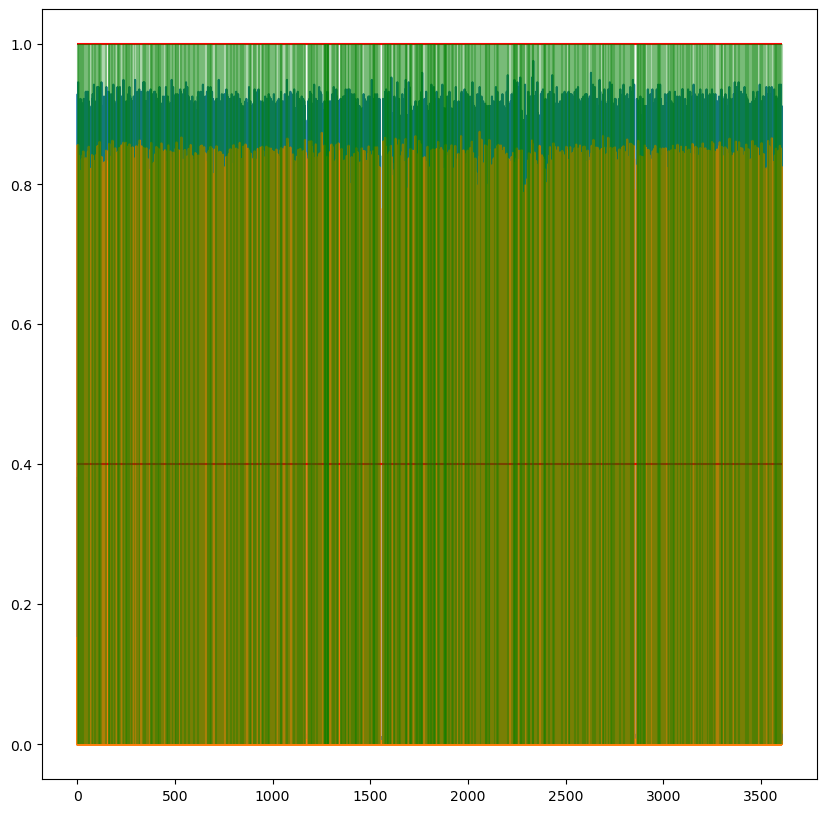

burst found in bin 291 (time 2.72 s)
burst found in bin 544 (time 5.25 s)
burst found in bin 752 (time 7.33 s)
burst found in bin 998 (time 9.79 s)
burst found in bin 1436 (time 14.17 s)
burst found in bin 1763 (time 17.44 s)
burst found in bin 2197 (time 21.78 s)
burst found in bin 2443 (time 24.24 s)
burst found in bin 2892 (time 28.73 s)
burst found in bin 3177 (time 31.58 s)
burst found in bin 3441 (time 34.22 s)
burst found in bin 4021 (time 40.02 s)
burst found in bin 4457 (time 44.38 s)
burst found in bin 5076 (time 50.57 s)
burst found in bin 5545 (time 55.26 s)
burst found in bin 5993 (time 59.74 s)
burst found in bin 6307 (time 62.88 s)
burst found in bin 6556 (time 65.37 s)
burst found in bin 7397 (time 73.78 s)
burst found in bin 7664 (time 76.45 s)
burst found in bin 7988 (time 79.69 s)
burst found in bin 8636 (time 86.17 s)
burst found in bin 9093 (time 90.74 s)
burst found in bin 9397 (time 93.78 s)
burst found in bin 9693 (time 96.74 s)
burst found in bin 10275 (time 10

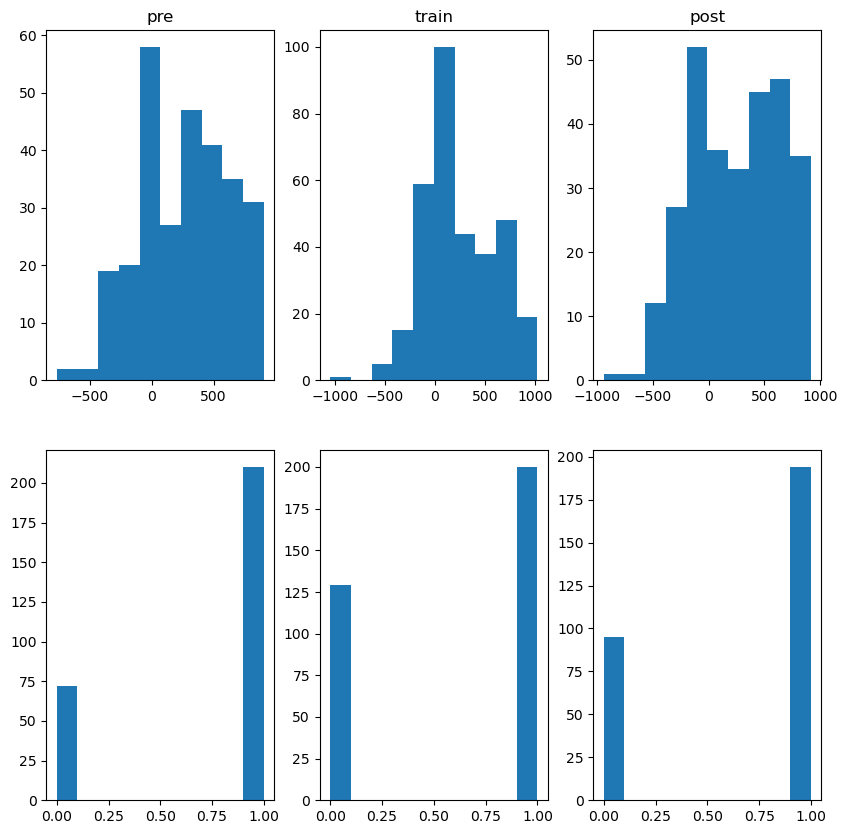

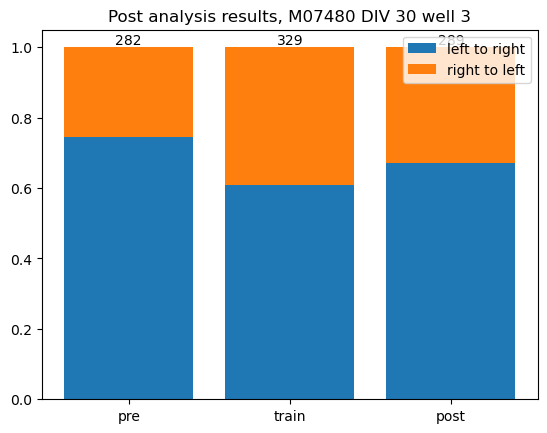

[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 

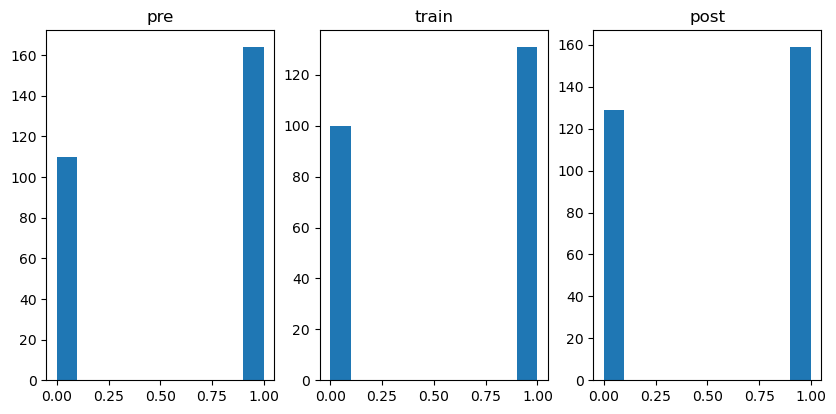

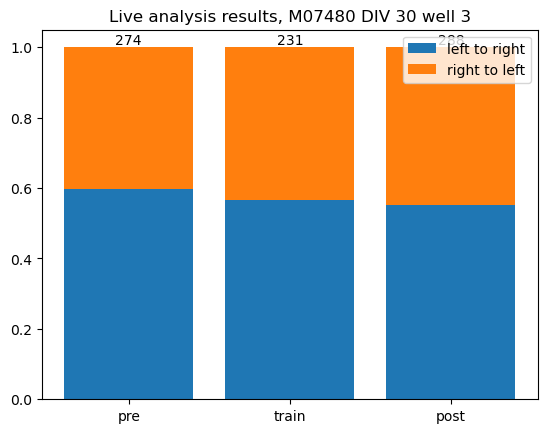

50485.0
12050563.0
24050375.0


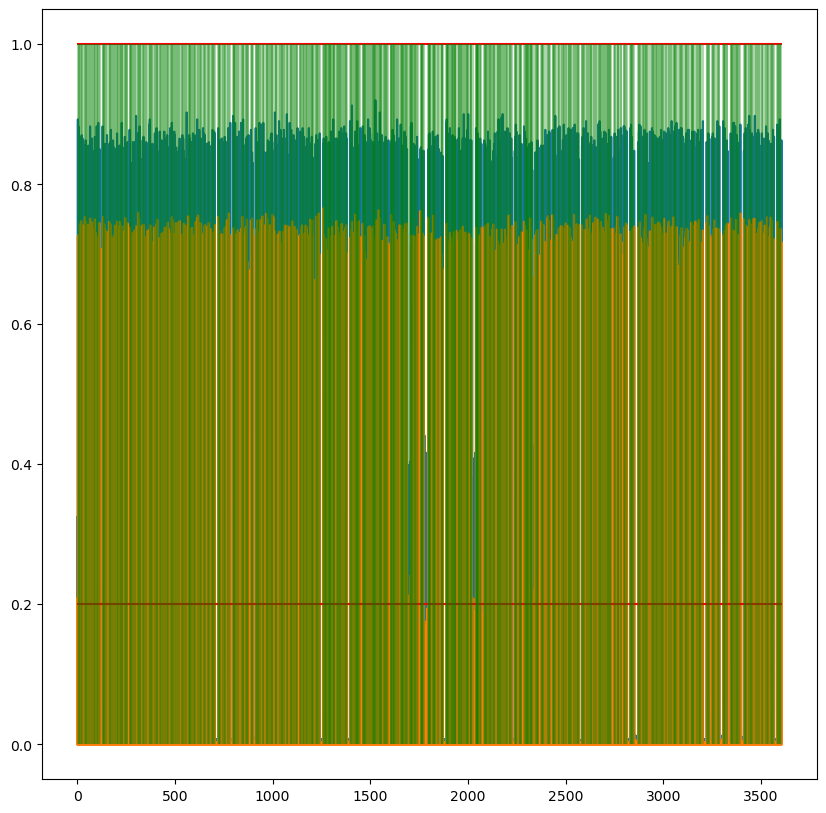

burst found in bin 400 (time 4.00 s)
burst found in bin 747 (time 7.47 s)
burst found in bin 1051 (time 10.51 s)
burst found in bin 1446 (time 14.46 s)
burst found in bin 2124 (time 21.24 s)
burst found in bin 2392 (time 23.92 s)
burst found in bin 2761 (time 27.61 s)
burst found in bin 3733 (time 37.33 s)
burst found in bin 4035 (time 40.35 s)
burst found in bin 4401 (time 44.01 s)
burst found in bin 4791 (time 47.91 s)
burst found in bin 5106 (time 51.06 s)
burst found in bin 5660 (time 56.60 s)
burst found in bin 6016 (time 60.16 s)
burst found in bin 6668 (time 66.68 s)
burst found in bin 7033 (time 70.33 s)
burst found in bin 7475 (time 74.75 s)
burst found in bin 8092 (time 80.92 s)
burst found in bin 8512 (time 85.12 s)
burst found in bin 9073 (time 90.73 s)
burst found in bin 9423 (time 94.23 s)
burst found in bin 10044 (time 100.44 s)
burst found in bin 10412 (time 104.12 s)
burst found in bin 10844 (time 108.44 s)
burst found in bin 11172 (time 111.72 s)
burst found in bin 11

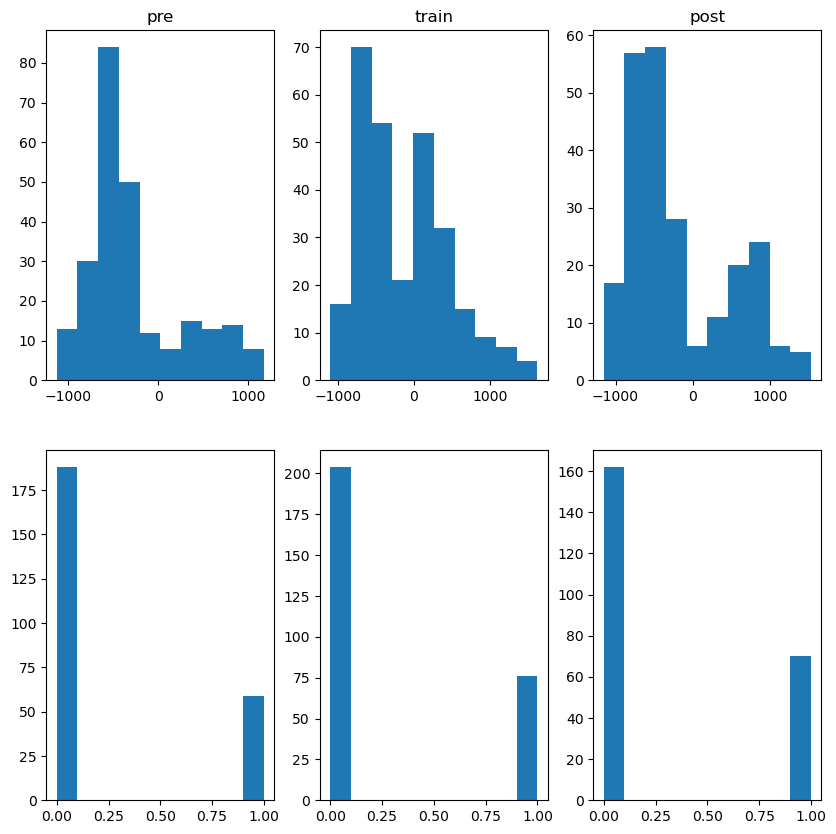

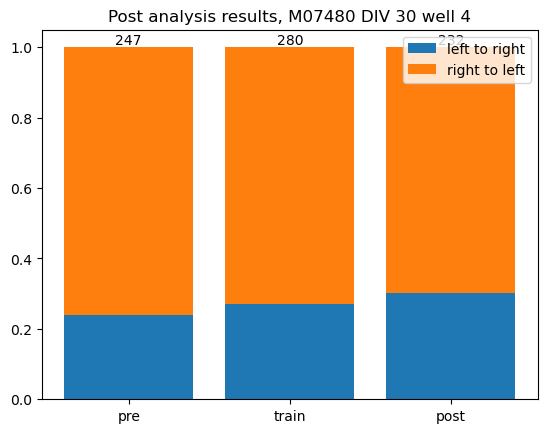

[1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 

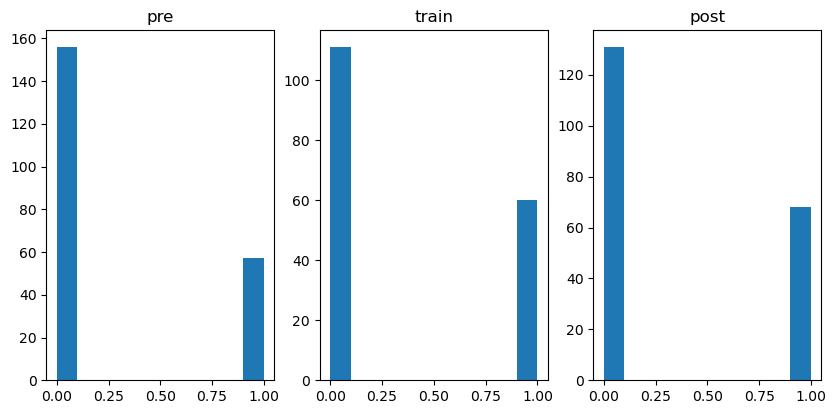

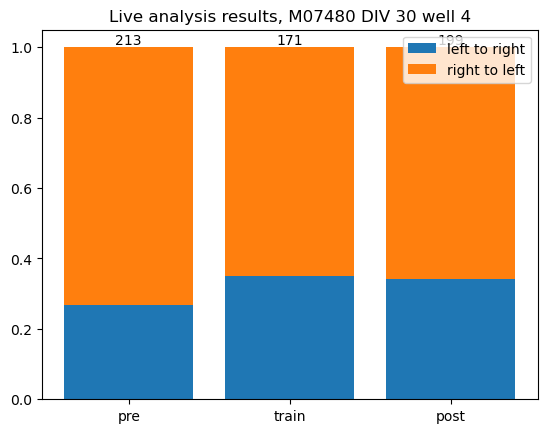

50485.0
12050563.0
24050375.0


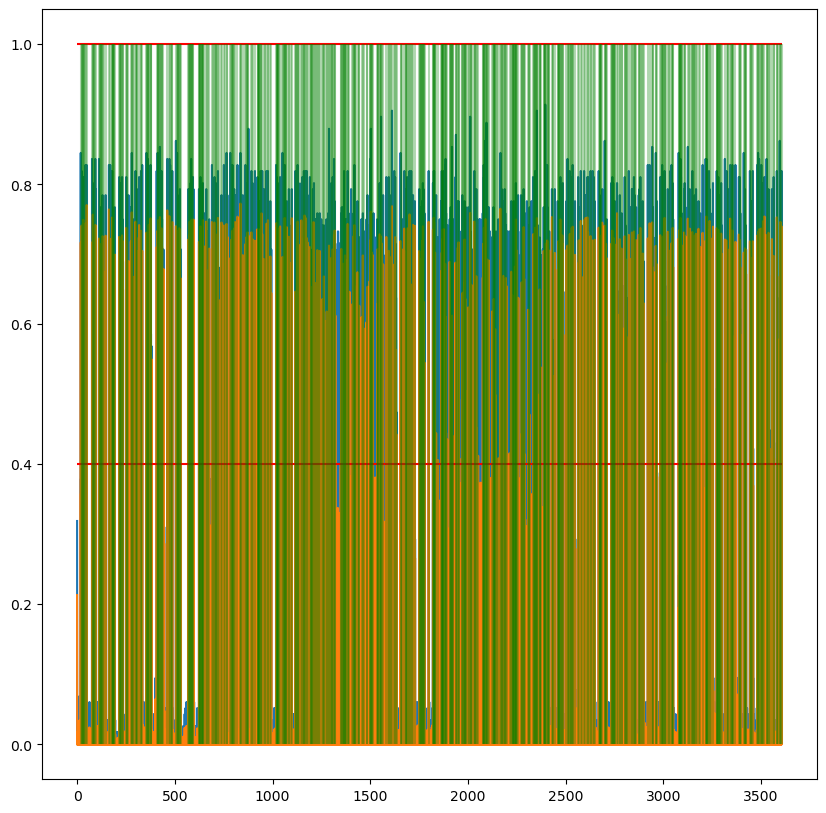

burst found in bin 1877 (time 18.77 s)
burst found in bin 2328 (time 23.28 s)
burst found in bin 2479 (time 24.79 s)
burst found in bin 2837 (time 28.37 s)
burst found in bin 3159 (time 31.59 s)
burst found in bin 3444 (time 34.44 s)
burst found in bin 3667 (time 36.67 s)
burst found in bin 3844 (time 38.44 s)
burst found in bin 4315 (time 43.15 s)
burst found in bin 4901 (time 49.01 s)
burst found in bin 7646 (time 76.46 s)
burst found in bin 8077 (time 80.77 s)
burst found in bin 8252 (time 82.52 s)
burst found in bin 8532 (time 85.32 s)
burst found in bin 8702 (time 87.02 s)
burst found in bin 9322 (time 93.22 s)
burst found in bin 9579 (time 95.79 s)
burst found in bin 11219 (time 112.19 s)
burst found in bin 11547 (time 115.47 s)
burst found in bin 11819 (time 118.19 s)
burst found in bin 12246 (time 122.46 s)
burst found in bin 12392 (time 123.92 s)
burst found in bin 12678 (time 126.78 s)
burst found in bin 13001 (time 130.01 s)
burst found in bin 13359 (time 133.59 s)
burst fou

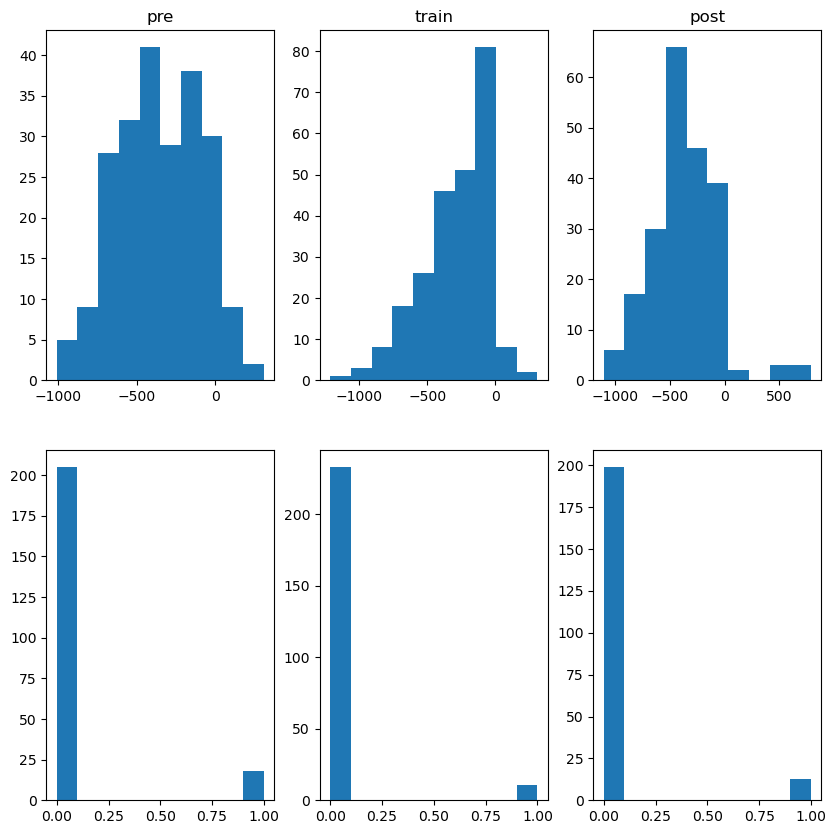

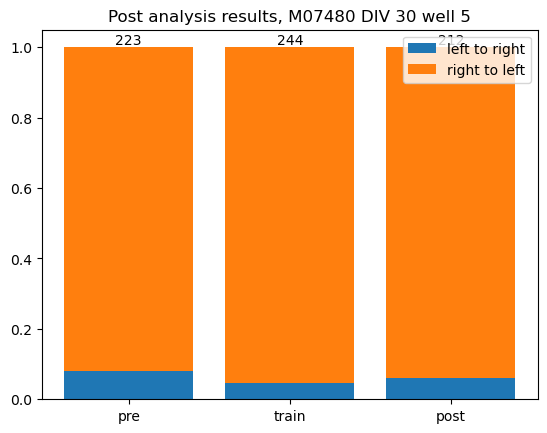

[1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 

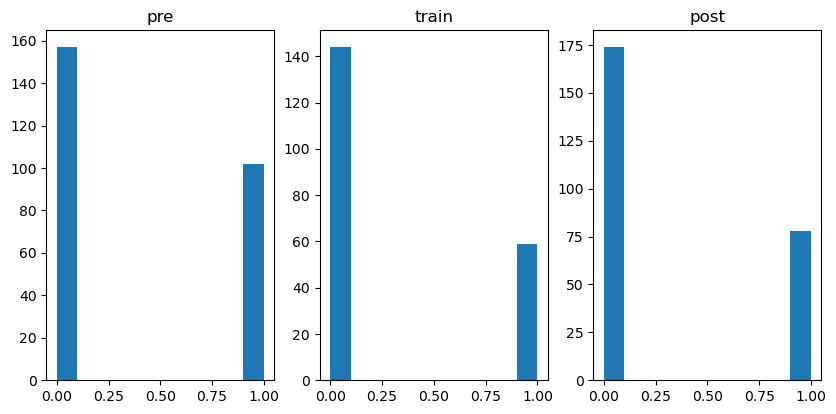

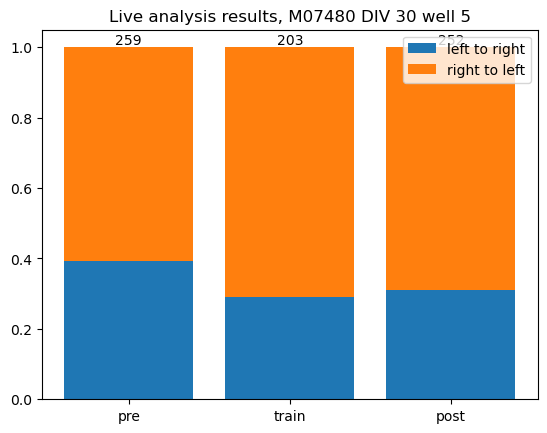

In [28]:
#Get bursts from raw data
burst_thresh_all = [0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
burst_direction_thresh = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
homedir=os.path.expanduser("~")
chip_id = "M07480"
div = 30
well_no = 0
for well_no in range(0, 6):
    filepath = f"/run/user/1000/gvfs/smb-share:server=rstoreint.it.tufts.edu,share=as_rsch_levinlab_wclawson01$/Experimental Data/Summer 2024/stim_removal/DIV{div}_stim_removal/{chip_id}/24{(div + 3)//31 + 7:02d}{(div + 2) % 31 + 1:02d}/0/well" + str(well_no) + "/"
    filepath = f"/run/user/1000/gvfs/smb-share:server=rstoreint.it.tufts.edu,share=as_rsch_levinlab_wclawson01$/Experimental Data/Summer 2024/stim_removal/DIV{div}_stim_removal/{chip_id}/24{(div + 3)//31 + 7:02d}{(div + 2) % 31 + 1:02d}/0/well{well_no}/"
    #filepath = f"/run/user/1001/gvfs/smb-share:server=rstore.it.tufts.edu,share=as_rsch_levinlab_wclawson01$/Experimental Data/Summer 2024/stim_removal/DIV{div}_stim_removal/M07471/2407{div + 3}/0/well" + str(well_no) + "/"

    filename = f"DIV{div}_stim_removal_well_" + str(well_no)
    filetag = ".raw.h5"
    datapath = homedir + "/temp/"

    csv_filename = f"burst_direction_{well_no}.csv"

    recording_no = 0

    events = mla.load_events(f"/run/user/1000/gvfs/smb-share:server=rstoreint.it.tufts.edu,share=as_rsch_levinlab_wclawson01$/Experimental Data/Summer 2024/stim_removal/DIV{div}_stim_removal/{chip_id}/24{(div + 3)//31 + 7:02d}{(div + 2) % 31 + 1:02d}/0/well{5}/" + f"DIV{div}_stim_removal_well_" + str(5) + filetag, 5, recording_no)

    pre_time = events.loc[events["eventid"] == 2, "time"].values[0]

    train_time = events.loc[events["eventid"] == 3, "time"].values[0]

    post_time = events.loc[events["eventid"] == 4, "time"].values[0]

    print(pre_time * 10000)
    print(train_time * 10000)
    print(post_time * 10000)

    burst_thresh = burst_thresh_all[well_no]

    burst_list = burst.find_bursts(filepath, filename, well_no, recording_no, chip_id = chip_id, datapath = datapath, stim_thresh = 1, burst_thresh = burst_thresh)

    burst_list_pre = list()
    burst_list_pre_directions = list()
    burst_list_train = list()
    burst_list_train_directions = list()
    burst_list_post = list()
    burst_list_post_directions = list()
    for i in burst_list:
        if train_time > i.time > pre_time:
            burst_list_pre.append(i)
            burst_list_pre_directions.append(i.direction(burst_direction_thresh[well_no]))
        elif post_time > i.time > train_time:
            burst_list_train.append(i)
            burst_list_train_directions.append(i.direction(burst_direction_thresh[well_no]))
        elif post_time < i.time:  
            burst_list_post.append(i)
            burst_list_post_directions.append(i.direction(burst_direction_thresh[well_no]))

    burst_list_pre_directions = np.array(burst_list_pre_directions)
    burst_list_train_directions = np.array(burst_list_train_directions)
    burst_list_post_directions = np.array(burst_list_post_directions)

    plt.figure(figsize = (10, 10))
    plt.subplot(231)
    plt.title("pre")
    plt.hist(burst_list_pre_directions)
    plt.subplot(232)
    plt.title("train")
    plt.hist(burst_list_train_directions)
    plt.subplot(233)
    plt.title("post")
    plt.hist(burst_list_post_directions)

    plt.subplot(234)
    plt.hist((burst_list_pre_directions > 0).astype(int))
    plt.subplot(235)
    plt.hist((burst_list_train_directions > 0).astype(int))
    plt.subplot(236)
    plt.hist((burst_list_post_directions > 0).astype(int))
    plt.show()

    pre = ((burst_list_pre_directions > 0).astype(int))
    train = ((burst_list_train_directions > 0).astype(int))
    post = ((burst_list_post_directions > 0).astype(int))
    title = f"Post analysis results, {chip_id} DIV {div} well {well_no}"
    stacked_bar_plot(pre, train, post, title)

    burst_directions = list()
    burst_frames = list()
    with open(filepath +csv_filename) as f:
        line_generator = (line.replace('"', '') for line in f)
        for i, row in enumerate(csv.reader(line_generator, delimiter=',')):
            if i % 4 == 1:
                time = float(row[0])
                burst_frames.append(time)
            elif i % 4 == 2:
                direction = row[-1]
                if direction == " right to left":
                    burst_directions.append(0)
                elif direction == " left to right":
                    burst_directions.append(1)

    assert len(burst_directions) == len(burst_frames)


    print(burst_directions)
    print(burst_frames)

    live_burst_list_pre = list()
    live_burst_list_pre_directions = list()
    live_burst_list_train = list()
    live_burst_list_train_directions = list()
    live_burst_list_post = list()
    live_burst_list_post_directions = list()

    for frame, direction in zip(burst_frames, burst_directions):
        if train_time * 10000 > frame + 50000 + 100 > pre_time:
            live_burst_list_pre.append(frame)
            live_burst_list_pre_directions.append(direction)
        elif post_time  * 10000 > frame + 50000 + 100 > train_time:
            live_burst_list_train.append(frame)
            live_burst_list_train_directions.append(direction)
        elif post_time * 10000 < frame + 50000 + 100:  
            live_burst_list_post.append(frame)
            live_burst_list_post_directions.append(direction)

    plt.figure(figsize = (10, 10))
    plt.subplot(231)
    plt.title("pre")
    plt.hist(live_burst_list_pre_directions)
    plt.subplot(232)
    plt.title("train")
    plt.hist(live_burst_list_train_directions)
    plt.subplot(233)
    plt.title("post")
    plt.hist(live_burst_list_post_directions)

    pre = live_burst_list_pre_directions
    train = live_burst_list_train_directions
    post = live_burst_list_post_directions
    title = f"Live analysis results, {chip_id} DIV {div} well {well_no}"
    stacked_bar_plot(pre, train, post, title)
